# Exemplo usando o Pandas

Importando as bibliotecas.

In [1]:
import pandas as pd               
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean,hmean
from scipy import stats

Carregando a base de dados.

In [2]:
df = pd.read_csv('https://hastie.su.domains/Papers/LARS/diabetes.data', sep="\t")

Verificando os dados.

In [3]:
df.head(8)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63


Verificando as informações do conjunto de dados.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [20]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


Essa base de dados contém informações como: idade em anos; sexo; índice de massa corporal bmi; bp pressão arterial média; s1 tc, colesterol de soro total; s2 ldl, lipoproteínas de baixa densidade; s3 hdl, lipoproteínas de alta densidade; s4 tch, colesterol total / HDL; s5 ltg, possivelmente log de nível de triglicérides de soro ; s6 glu, nível de açúcar no sangue.
E todos esses atributos se referem a estimar a variável Y que é uma medida quantitativa da progressão da doença de diabetes um ano após a linha de base.

##Verificando graficamente as distribuições dos atributos do Dataframe

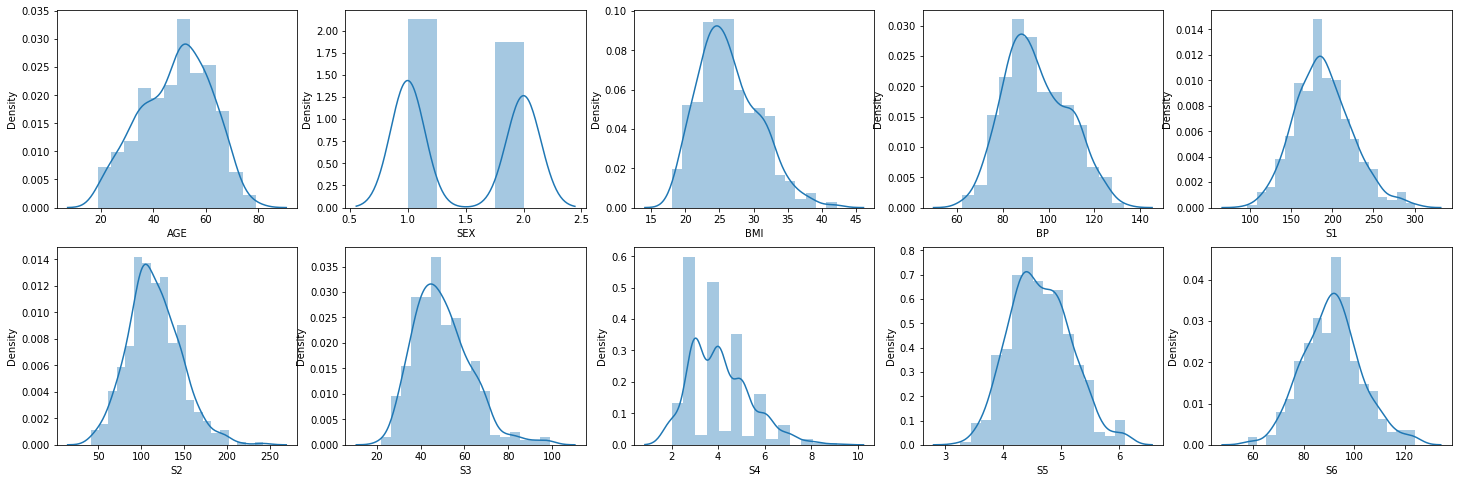

In [ ]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df1 = df.drop(columns='Y', axis=1)

fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(25, 8))
for i, column in enumerate(df1.select_dtypes(include=np.number).columns.tolist()):
    sns.distplot(df[column],ax=axes[i//5,i%5])

Das distribuições mostradas é possível concluir que o sexo não seja um atributo tão importante, porém a idade pode sim ter grande impacto no resultado dos dados assim como BMI, BP, S1, S2, S3, S5 e S6 que são os que possuem distribuição mais próxima de ser normal.

##Visualizando a correlação dos dados:

In [ ]:
df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.0,0.17,0.19,0.34,0.26,0.22,-0.075,0.2,0.27,0.3,0.19
SEX,0.17,1.0,0.088,0.24,0.035,0.14,-0.38,0.33,0.15,0.21,0.043
BMI,0.19,0.088,1.0,0.4,0.25,0.26,-0.37,0.41,0.45,0.39,0.59
BP,0.34,0.24,0.4,1.0,0.24,0.19,-0.18,0.26,0.39,0.39,0.44
S1,0.26,0.035,0.25,0.24,1.0,0.9,0.052,0.54,0.52,0.33,0.21
S2,0.22,0.14,0.26,0.19,0.9,1.0,-0.2,0.66,0.32,0.29,0.17
S3,-0.075,-0.38,-0.37,-0.18,0.052,-0.2,1.0,-0.74,-0.4,-0.27,-0.39
S4,0.2,0.33,0.41,0.26,0.54,0.66,-0.74,1.0,0.62,0.42,0.43
S5,0.27,0.15,0.45,0.39,0.52,0.32,-0.4,0.62,1.0,0.46,0.57
S6,0.3,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.0,0.38


Da tabela mostrada, nota-se que os atributos S1 e S2 são os que mais se correlacionam e por isso são fortes candidatos a terem maior representatividade em meio aos demais atributos.

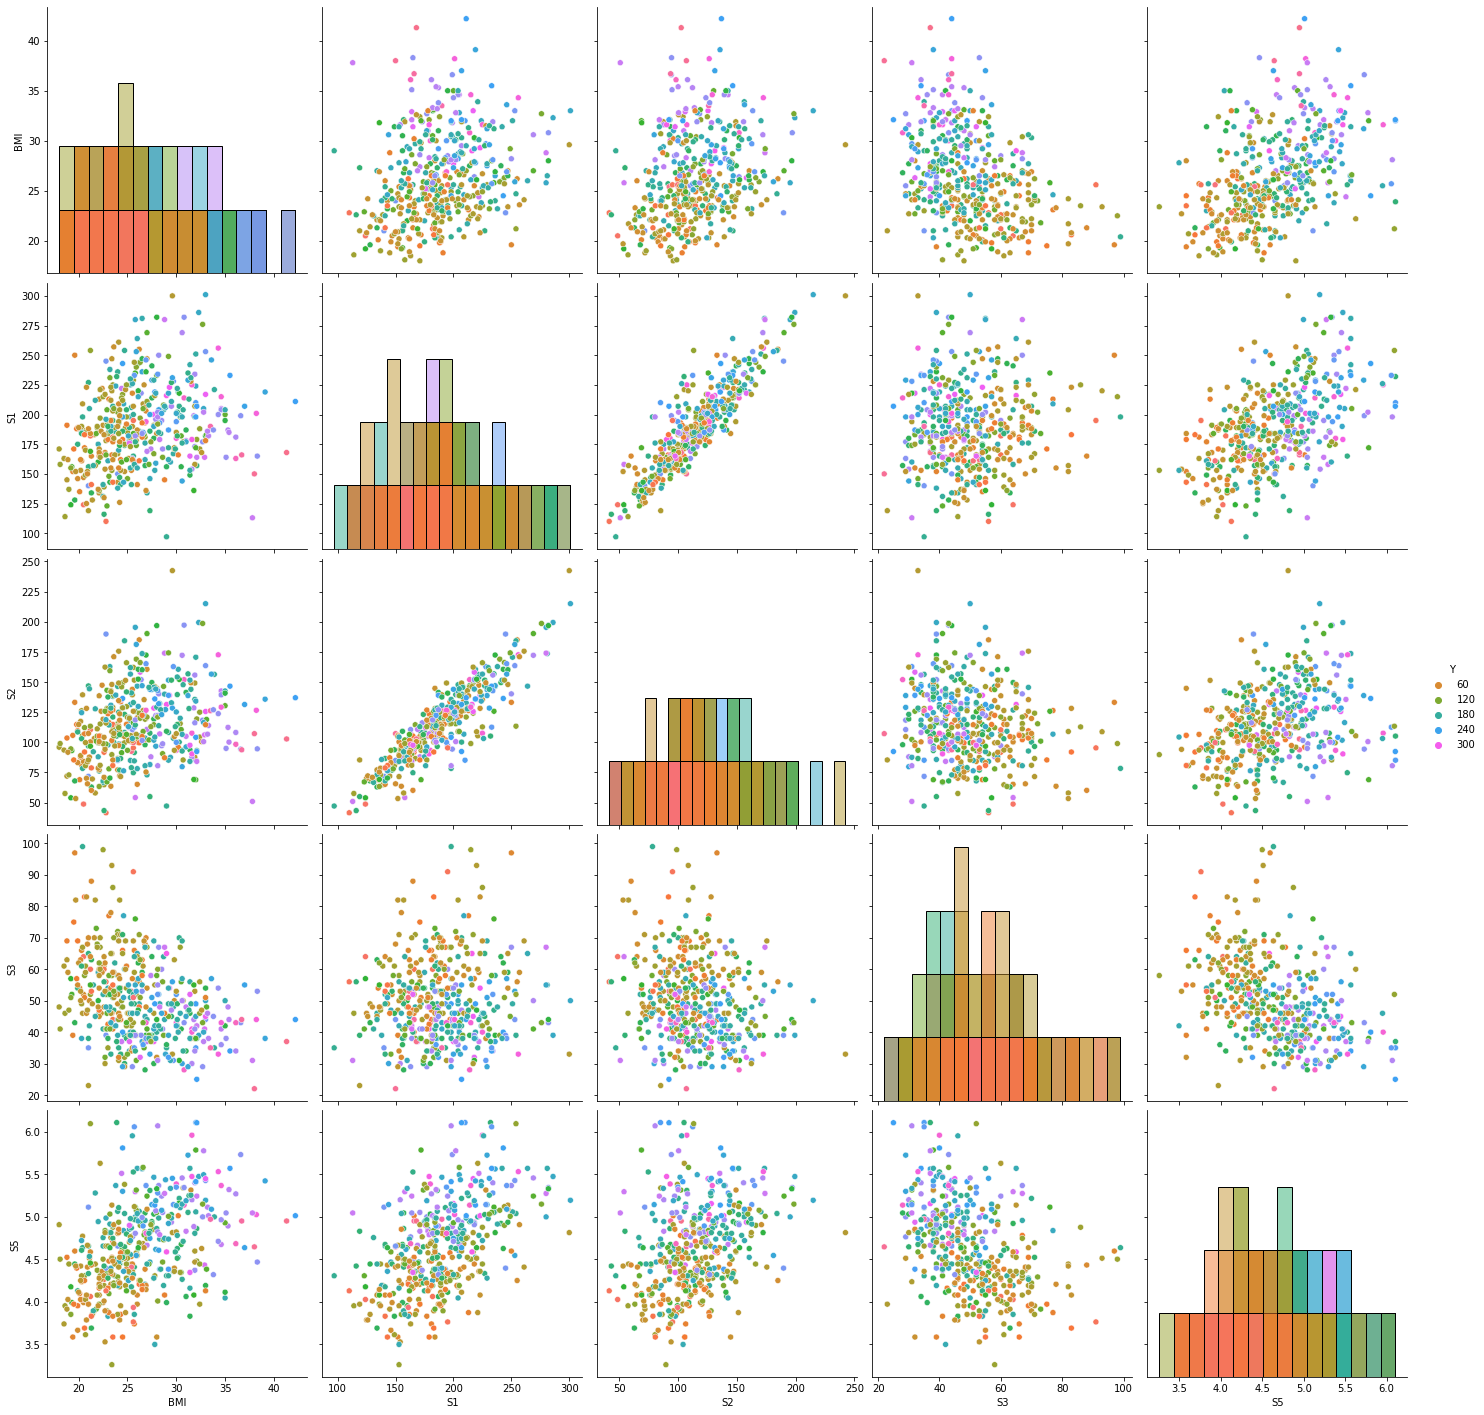

In [6]:
names0 = ['AGE', 'SEX',	'BP', 'S4',	'S6']
df2 = df.drop(columns=names0)
sns.pairplot(df2, height=4, hue='Y', diag_kind = 'hist', palette = "husl")
# to show
plt.show()

Nessa plotagem pairplot foram selecionados os atributos que aparentavam ter alguma correlação com outros atributos e também com Y. Nele é possível notar o reforço do quão as variáveis S1 e S2 estão correlacionadas

# Medidas de Assimetria
Nos possibilitam analisar uma distribuição em relação a sua moda, mediana e média.

In [7]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import kurtosis, skew
%matplotlib inline

##Função para calcular estatísticas.

In [8]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Person: {}\nCoeficiente de Kurtosi: {}".format(mean,mode,median,var,std,coef_pearson,coef_kurtosis))
  return msg

In [9]:
names = ['AGE',	'SEX',	'BMI',	'BP',	'S1',	'S2',	'S3',	'S4',	'S5',	'S6',	'Y']

In [10]:
for nomes in names:
  print("\nEstatísticas de {}:".format(nomes))
  calcula_estatisticas(df[nomes])


Estatísticas de AGE:
Media: 48.52
Moda: 53
Mediana: 50.0
Variância: 171.46
Desvio Padrão: 13.09
Coeficiente Person: -0.23
Coeficiente de Kurtosi: -0.68

Estatísticas de SEX:
Media: 1.47
Moda: 1
Mediana: 1.0
Variância: 0.25
Desvio Padrão: 0.5
Coeficiente Person: 0.13
Coeficiente de Kurtosi: -1.98

Estatísticas de BMI:
Media: 26.38
Moda: 23.5
Mediana: 25.7
Variância: 19.48
Desvio Padrão: 4.41
Coeficiente Person: 0.6
Coeficiente de Kurtosi: 0.08

Estatísticas de BP:
Media: 94.65
Moda: 83.0
Mediana: 93.0
Variância: 190.87
Desvio Padrão: 13.82
Coeficiente Person: 0.29
Coeficiente de Kurtosi: -0.54

Estatísticas de S1:
Media: 189.14
Moda: 162
Mediana: 186.0
Variância: 1195.01
Desvio Padrão: 34.57
Coeficiente Person: 0.38
Coeficiente de Kurtosi: 0.22

Estatísticas de S2:
Media: 115.44
Moda: 114.8
Mediana: 113.0
Variância: 922.86
Desvio Padrão: 30.38
Coeficiente Person: 0.44
Coeficiente de Kurtosi: 0.58

Estatísticas de S3:
Media: 49.79
Moda: 46.0
Mediana: 48.0
Variância: 166.92
Desvio Padrão

Sabendo que o atributo SEX não possui significado quantitativo, nota-se que o atributo que possui menor desvio padrão e portanto é mais uniforme é a S5.

## Verificando a distribuição de probabilidade e a diferença entre a média e a mediana.

In [11]:
for i, column in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    media = round(df[column].mean(),2)
    std = df[column].std()
    cvar = round(std/media*100,2)
    median = df[column].median()
    print("Atributo: {}, Coeficiente de Variação: {} %, Media: {}, Mediana: {}".format(column,cvar,media,median))

Atributo: AGE, Coeficiente de Variação: 27.02 %, Media: 48.52, Mediana: 50.0
Atributo: SEX, Coeficiente de Variação: 33.98 %, Media: 1.47, Mediana: 1.0
Atributo: BMI, Coeficiente de Variação: 16.75 %, Media: 26.38, Mediana: 25.7
Atributo: BP, Coeficiente de Variação: 14.61 %, Media: 94.65, Mediana: 93.0
Atributo: S1, Coeficiente de Variação: 18.3 %, Media: 189.14, Mediana: 186.0
Atributo: S2, Coeficiente de Variação: 26.35 %, Media: 115.44, Mediana: 113.0
Atributo: S3, Coeficiente de Variação: 25.98 %, Media: 49.79, Mediana: 48.0
Atributo: S4, Coeficiente de Variação: 31.71 %, Media: 4.07, Mediana: 4.0
Atributo: S5, Coeficiente de Variação: 11.26 %, Media: 4.64, Mediana: 4.62005
Atributo: S6, Coeficiente de Variação: 12.6 %, Media: 91.26, Mediana: 91.0
Atributo: Y, Coeficiente de Variação: 50.68 %, Media: 152.13, Mediana: 140.5
